Airlines Delay Prediction
Applying machine learning classification techniques to predict if a specific flight will be delayed or not.

In [1]:
#import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.pipeline import Pipeline

In [2]:
df = pd.read_csv('data/Airlines.csv')

In [3]:
df.head()

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay
0,1,CO,269,SFO,IAH,3,15,205,1
1,2,US,1558,PHX,CLT,3,15,222,1
2,3,AA,2400,LAX,DFW,3,20,165,1
3,4,AA,2466,SFO,DFW,3,20,195,1
4,5,AS,108,ANC,SEA,3,30,202,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539383 entries, 0 to 539382
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           539383 non-null  int64 
 1   Airline      539383 non-null  object
 2   Flight       539383 non-null  int64 
 3   AirportFrom  539383 non-null  object
 4   AirportTo    539383 non-null  object
 5   DayOfWeek    539383 non-null  int64 
 6   Time         539383 non-null  int64 
 7   Length       539383 non-null  int64 
 8   Delay        539383 non-null  int64 
dtypes: int64(6), object(3)
memory usage: 37.0+ MB


In [5]:
df['Delay'].value_counts()

0    299119
1    240264
Name: Delay, dtype: int64

In [6]:
df.describe()

,id,Flight,DayOfWeek,Time,Length,Delay
count,539383.00000,539383.000000,539383.000000,539383.000000,539383.000000,539383.000000
mean,269692.00000,2427.928630,3.929668,802.728963,132.202007,0.445442
std,155706.60446,2067.429837,1.914664,278.045911,70.117016,0.497015
min,1.00000,1.000000,1.000000,10.000000,0.000000,0.000000
25%,134846.50000,712.000000,2.000000,565.000000,81.000000,0.000000
50%,269692.00000,1809.000000,4.000000,795.000000,115.000000,0.000000
75%,404537.50000,3745.000000,5.000000,1035.000000,162.000000,1.000000
max,539383.00000,7814.000000,7.000000,1439.000000,655.000000,1.000000


In [7]:
df.isnull().sum()

id             0
Airline        0
Flight         0
AirportFrom    0
AirportTo      0
DayOfWeek      0
Time           0
Length         0
Delay          0
dtype: int64

In [8]:
df.columns

Index(['id', 'Airline', 'Flight', 'AirportFrom', 'AirportTo', 'DayOfWeek',
       'Time', 'Length', 'Delay'],
      dtype='object')

In [9]:
df.dtypes

id              int64
Airline        object
Flight          int64
AirportFrom    object
AirportTo      object
DayOfWeek       int64
Time            int64
Length          int64
Delay           int64
dtype: object

<AxesSubplot:>

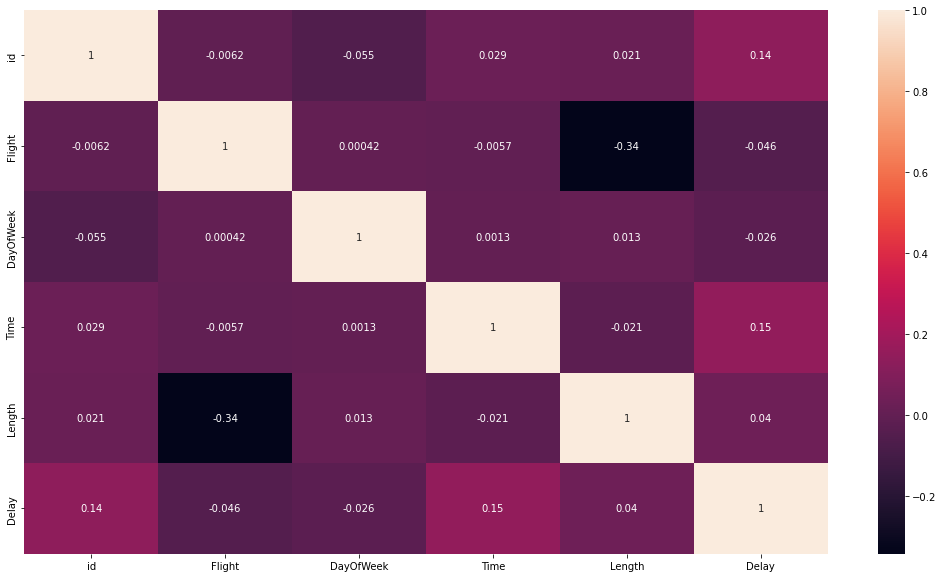

In [10]:
plt.figure(figsize = (18, 10))
sns.heatmap(df.corr(), annot = True)

<AxesSubplot:xlabel='Time', ylabel='Count'>

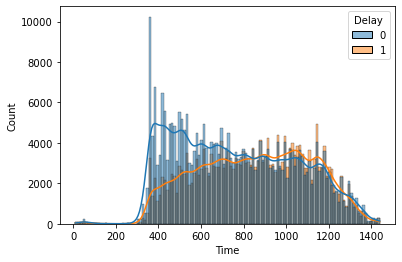

In [11]:
sns.histplot(data = df, x = 'Time', hue = 'Delay', kde = True)

<AxesSubplot:xlabel='Length', ylabel='Count'>

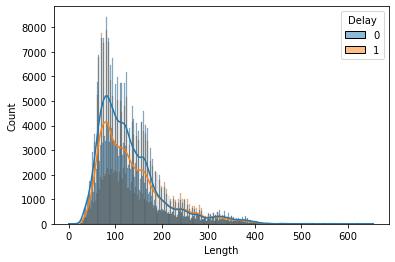

In [12]:
sns.histplot(data = df, x = 'Length', hue = 'Delay', kde = True)

<AxesSubplot:xlabel='Airline', ylabel='count'>

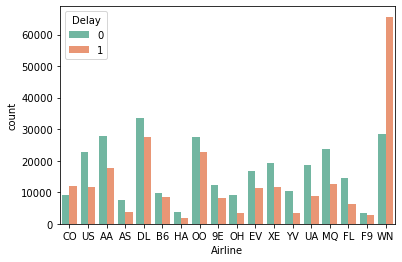

In [13]:
sns.countplot(data = df, x = 'Airline', hue = 'Delay', palette = 'Set2')

<AxesSubplot:xlabel='DayOfWeek', ylabel='count'>

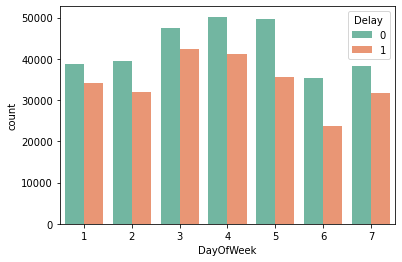

In [14]:
sns.countplot(data = df, x = 'DayOfWeek', hue = 'Delay', palette = 'Set2')

In [15]:
df['Airline'].value_counts()

WN    94097
DL    60940
OO    50254
AA    45656
MQ    36605
US    34500
XE    31126
EV    27983
UA    27619
CO    21118
FL    20827
9E    20686
B6    18112
YV    13725
OH    12630
AS    11471
F9     6456
HA     5578
Name: Airline, dtype: int64

In [16]:
df['Airline'].nunique()

18

In [17]:
df['AirportFrom'].nunique()

293

In [18]:
df['AirportTo'].nunique()

293

In [19]:
df['DayOfWeek'].value_counts()

4    91445
3    89746
5    85248
1    72769
2    71340
7    69879
6    58956
Name: DayOfWeek, dtype: int64

<AxesSubplot:xlabel='Length', ylabel='Count'>

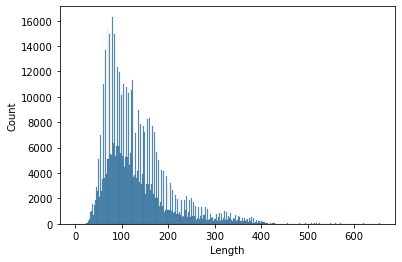

In [20]:
sns.histplot(data = df, x = 'Length')

In [21]:
df = df.drop('id', axis = 1)

In [22]:
X = df.drop('Delay', axis = 1)
y = df['Delay']

In [23]:
X_cat = df.select_dtypes('object')
X

,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length
0,CO,269,SFO,IAH,3,15,205
1,US,1558,PHX,CLT,3,15,222
2,AA,2400,LAX,DFW,3,20,165
3,AA,2466,SFO,DFW,3,20,195
4,AS,108,ANC,SEA,3,30,202
...,...,...,...,...,...,...,...
539378,CO,178,OGG,SNA,5,1439,326
539379,FL,398,SEA,ATL,5,1439,305
539380,FL,609,SFO,MKE,5,1439,255
539381,UA,78,HNL,SFO,5,1439,313


In [24]:
airline_encoder = LabelEncoder()
airport_from_encoder = LabelEncoder()
airport_to_encoder = LabelEncoder()
X.iloc[:, 0] = airline_encoder.fit_transform(X.iloc[:, 0])
X.iloc[:, 2] = airport_from_encoder.fit_transform(X.iloc[:, 2])
X.iloc[:, 3] = airport_to_encoder.fit_transform(X.iloc[:, 3])
X

,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length
0,4,269,253,135,3,15,205
1,14,1558,217,60,3,15,222
2,1,2400,154,80,3,20,165
3,1,2466,253,80,3,20,195
4,2,108,14,252,3,30,202
...,...,...,...,...,...,...,...
539378,4,178,203,264,5,1439,326
539379,8,398,252,16,5,1439,305
539380,8,609,253,184,5,1439,255
539381,13,78,128,253,5,1439,313


In [25]:
scaler = StandardScaler()
X_transformed = scaler.fit_transform(X)
X_transformed

array([[-1.00530759, -1.04425823,  1.37168161, ..., -0.48555175,
        -2.83309217,  1.03823673],
       [ 0.87922247, -0.42077821,  0.91816517, ..., -0.48555175,
        -2.83309217,  1.2806888 ],
       [-1.57066661, -0.01350888,  0.1245114 , ..., -0.48555175,
        -2.81510951,  0.46776126],
       ...,
       [-0.25149556, -0.87980268,  1.37168161, ...,  0.55901871,
         2.28836894,  1.75133106],
       [ 0.69076947, -1.13664356, -0.20302825, ...,  0.55901871,
         2.28836894,  2.57852048],
       [ 0.87922247, -0.47688658,  0.1245114 , ...,  0.55901871,
         2.28836894,  2.40737784]])

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size = 0.3, random_state = 42)

In [27]:
X_train.shape, y_train.shape

((377568, 7), (377568,))

In [28]:
X_test.shape, y_test.shape

((161815, 7), (161815,))

In [29]:
#Logistic Regression
model_lgr = LogisticRegression(solver = 'liblinear').fit(X_train, y_train)
pred_lgr = model_lgr.predict(X_test)
model_lgr_score = model_lgr.score(X_test, y_test)
print(model_lgr_score)

0.584531718320304


In [30]:
print(classification_report(y_test, pred_lgr))

              precision    recall  f1-score   support

           0       0.60      0.76      0.67     89905
           1       0.55      0.36      0.43     71910

    accuracy                           0.58    161815
   macro avg       0.57      0.56      0.55    161815
weighted avg       0.58      0.58      0.57    161815



In [31]:
#Grid Searching over LogisticRegression parameters
param = {'penalty': ['l1', 'l2']}
grid_lgr = GridSearchCV(model_lgr, param_grid = param, scoring = 'accuracy')
grid_lgr.fit(X_train, y_train)
print(grid_lgr.best_params_)
print(grid_lgr.best_score_)

{'penalty': 'l1'}
0.5839239572192533


In [32]:
#Decision Tree
model_dtree = DecisionTreeClassifier().fit(X_train, y_train)
pred_dtree = model_dtree.predict(X_test)
model_dtree_score = model_dtree.score(X_test, y_test)
print(model_dtree_score)

0.6082872416030652


In [33]:
print(classification_report(y_test, pred_dtree))

              precision    recall  f1-score   support

           0       0.63      0.71      0.67     89905
           1       0.57      0.48      0.52     71910

    accuracy                           0.61    161815
   macro avg       0.60      0.60      0.59    161815
weighted avg       0.60      0.61      0.60    161815



In [34]:
#Grid Searching over Decision Tree parameters
param = {'criterion': ['gini', 'entropy'], 'max_depth': [1, 2, 3], 'min_samples_split': [6, 10]}
grid_dtree = GridSearchCV(model_dtree, param_grid = param, scoring = 'accuracy')
grid_dtree.fit(X_train, y_train)
print(grid_dtree.best_params_)
print(grid_dtree.best_score_)

{'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 6}
0.623315540410937


[Text(0.5, 0.875, 'Airline <= 0.973\ngini = 0.494\nsamples = 377568\nvalue = [209214, 168354]\nclass = No Delay'),
 Text(0.25, 0.625, 'Time <= -0.925\ngini = 0.479\nsamples = 280247\nvalue = [168546, 111701]\nclass = No Delay'),
 Text(0.125, 0.375, 'Length <= 0.618\ngini = 0.4\nsamples = 66285\nvalue = [47984, 18301]\nclass = No Delay'),
 Text(0.0625, 0.125, 'gini = 0.379\nsamples = 50194\nvalue = [37427, 12767]\nclass = No Delay'),
 Text(0.1875, 0.125, 'gini = 0.451\nsamples = 16091\nvalue = [10557, 5534]\nclass = No Delay'),
 Text(0.375, 0.375, 'Airline <= -0.346\ngini = 0.492\nsamples = 213962\nvalue = [120562, 93400]\nclass = No Delay'),
 Text(0.3125, 0.125, 'gini = 0.499\nsamples = 113477\nvalue = [59636, 53841]\nclass = No Delay'),
 Text(0.4375, 0.125, 'gini = 0.477\nsamples = 100485\nvalue = [60926, 39559]\nclass = No Delay'),
 Text(0.75, 0.625, 'Airline <= 1.162\ngini = 0.487\nsamples = 97321\nvalue = [40668, 56653]\nclass = Delay'),
 Text(0.625, 0.375, 'Time <= -0.756\ngini = 

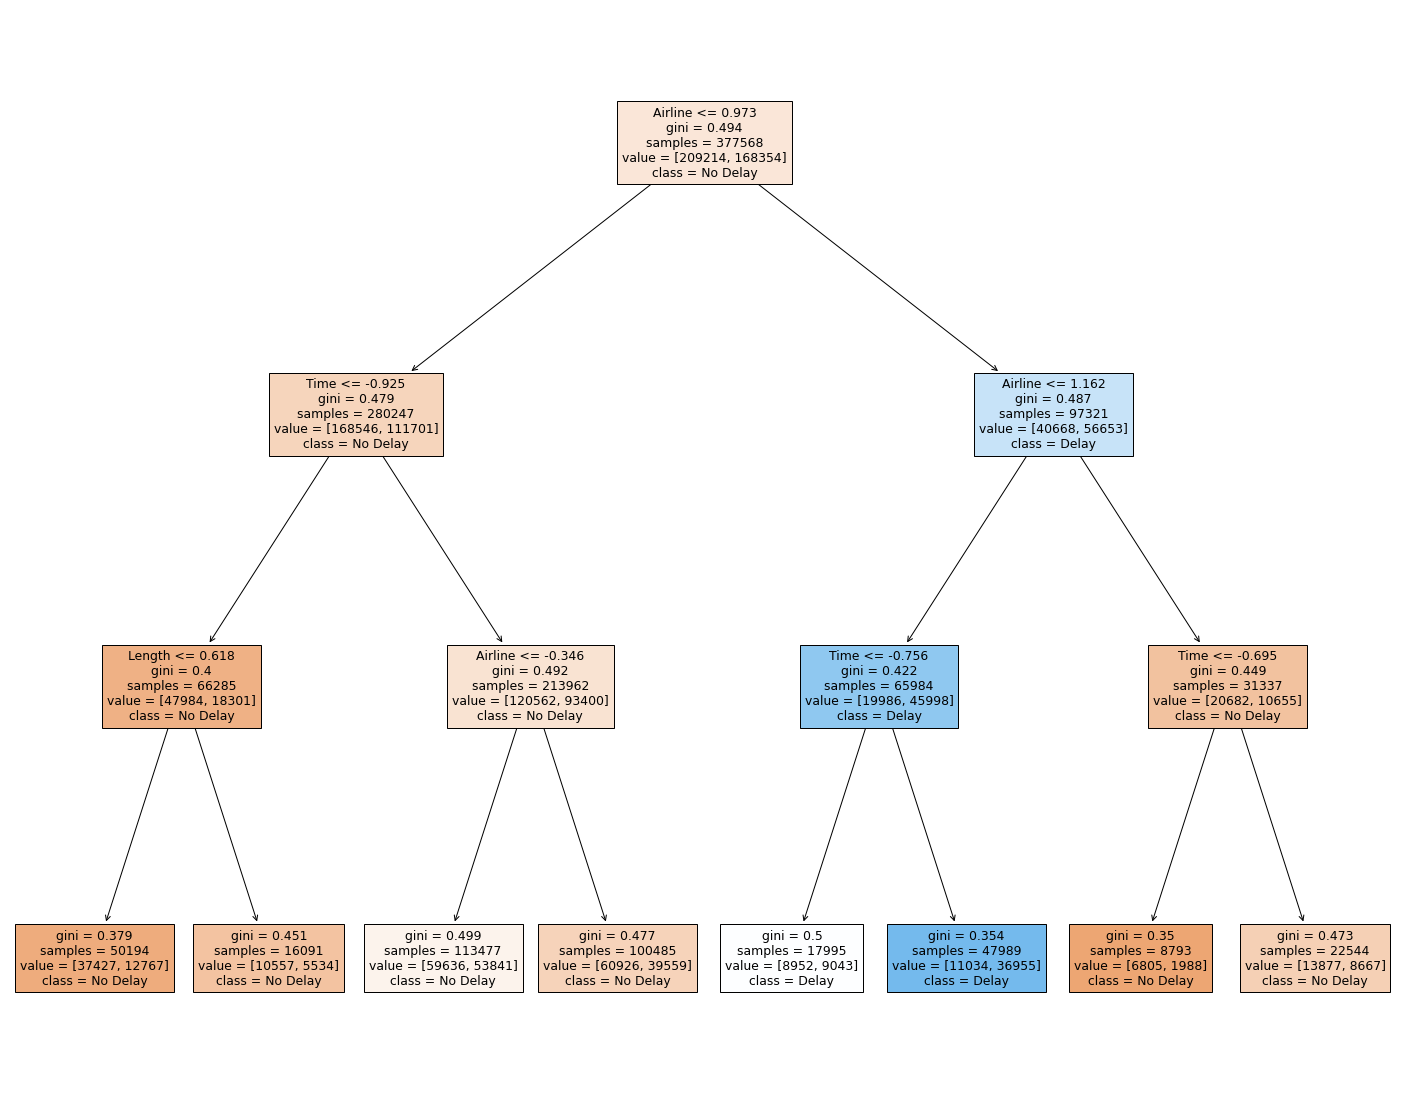

In [35]:
model_dtree2 = DecisionTreeClassifier(max_depth = 3).fit(X_train, y_train)
fig = plt.figure(figsize = (25, 20))
plot_tree(model_dtree2, feature_names = X.columns, class_names = ['No Delay', 'Delay'], filled = True)

In [36]:
feature_imp = pd.Series(model_dtree2.feature_importances_, index = X.columns).sort_values(ascending = False)
print(feature_imp)

Airline        0.687504
Time           0.300257
Length         0.012239
Flight         0.000000
AirportFrom    0.000000
AirportTo      0.000000
DayOfWeek      0.000000
dtype: float64


In [37]:
#KNN
model_knn = KNeighborsClassifier().fit(X_train, y_train)
pred_knn = model_knn.predict(X_test)
model_knn_score = model_knn.score(X_test, y_test)
print(model_knn_score)

0.6144980378827674


In [38]:
print(classification_report(y_test, pred_knn))

              precision    recall  f1-score   support

           0       0.64      0.68      0.66     89905
           1       0.57      0.53      0.55     71910

    accuracy                           0.61    161815
   macro avg       0.61      0.61      0.61    161815
weighted avg       0.61      0.61      0.61    161815



In [39]:
#Grid Searching over KNN parameters
param = {'n_neighbors': list(range(1, 10))}
grid_knn = GridSearchCV(model_knn, param_grid = param, scoring = 'accuracy')
grid_knn.fit(X_train, y_train)
print(grid_knn.best_params_)
print(grid_knn.best_score_)

{'n_neighbors': 8}
0.6239538401889699


In [40]:
#Random Forest
model_random = RandomForestClassifier().fit(X_train, y_train)
pred_random = model_random.predict(X_test)
model_random_score = model_random.score(X_test, y_test)
print(model_random_score)

0.6187189073942465


In [41]:
print(classification_report(y_test, pred_random))

              precision    recall  f1-score   support

           0       0.65      0.67      0.66     89905
           1       0.57      0.56      0.56     71910

    accuracy                           0.62    161815
   macro avg       0.61      0.61      0.61    161815
weighted avg       0.62      0.62      0.62    161815



In [42]:
#Grid Searching over Random Forest parameters
param = {'n_estimators': [60, 80], 'max_depth': [2, 3]}
grid_random = GridSearchCV(model_random, param_grid = param, scoring = 'accuracy')
grid_random.fit(X_train, y_train)
print(grid_random.best_params_)
print(grid_random.best_score_)

{'max_depth': 3, 'n_estimators': 60}
0.6243855499001549


In [43]:
result_dictionary = {'Logistic Regression': [model_lgr_score, grid_lgr.best_score_],
                    'Decision Tree': [model_dtree_score, grid_dtree.best_score_],
                    'KNN': [model_knn_score, grid_knn.best_score_],
                    'Random Forest': [model_random_score, grid_random.best_score_]}
result_df = pd.DataFrame(result_dictionary, index = ['Default Settings', 'Best params'])
result_df

,Logistic Regression,Decision Tree,KNN,Random Forest
Default Settings,0.584532,0.608287,0.614498,0.618719
Best params,0.583924,0.623316,0.623954,0.624386


In [44]:
extractor = SelectFromModel(DecisionTreeClassifier(max_depth = 3))
pipe = Pipeline([('selector', extractor), ('knn', KNeighborsClassifier(n_neighbors = 8))])
pipe.fit(X_train, y_train)
pipe_score = pipe.score(X_test, y_test)
pipe_score

0.6222785279485833